# Tutorial 0: Basic examples

In [1]:
import warnings
import sys
warnings.filterwarnings('ignore')

from sklearn.datasets import load_diabetes
from synthcity.plugins import Plugins
import synthcity.logger as log

log.add(sink=sys.stderr, level="INFO")

X, y = load_diabetes(return_X_y=True, as_frame=True)
X["target"] = y

X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


## List the available generative models

In [2]:
from synthcity.plugins import Plugins

Plugins().list()

['tvae',
 'uniform_sampler',
 'nflow',
 'pategan',
 'copulagan',
 'adsgan',
 'ctgan',
 'gaussian_copula',
 'privbayes',
 'bayesian_network',
 'rtvae',
 'marginal_distributions']

## Load and train a generative model

In [3]:
from synthcity.plugins import Plugins

syn_model = Plugins().get("marginal_distributions")

syn_model.fit(X)

## Generate new data using the model

In [4]:
syn_model.generate(count = 10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,-0.006020,-0.044642,-0.084170,0.031953,0.078783,0.094779,0.023939,-0.006783,0.013159,-0.124407,301.369079
1,0.083049,0.050680,-0.066872,0.103187,-0.068117,0.012541,-0.041270,0.086632,-0.086134,0.055378,114.630272
2,-0.095959,0.050680,-0.041111,-0.057162,0.114957,-0.100316,0.010050,0.154651,0.120099,0.076718,181.236647
3,0.068095,-0.044642,0.033317,0.004067,0.070809,0.050502,0.051795,-0.066778,0.133554,-0.001282,260.846500
4,-0.016630,0.050680,0.160323,-0.085672,0.148285,0.025661,-0.059313,0.070293,0.004265,-0.132840,340.756737
5,-0.038291,0.050680,-0.085576,-0.082974,-0.114863,-0.093300,-0.067835,0.080387,0.057766,-0.124838,136.969243
6,0.011526,-0.044642,0.092347,0.100185,0.075477,0.197816,0.163083,-0.038155,-0.107525,0.125692,80.665397
7,0.063214,0.050680,0.077614,0.043666,0.007622,0.157347,0.019797,0.149064,-0.090391,0.033822,296.588326
8,-0.025917,-0.044642,0.003292,-0.055120,0.088423,0.118043,0.023173,0.158127,0.101561,-0.124830,297.152706
9,-0.037203,0.050680,-0.065609,0.019897,-0.045228,0.052495,0.033565,-0.041591,0.028095,-0.016103,265.619059


## Generate new data under some constraints

In [5]:
# Constraint: target <= 100
from synthcity.plugins.core.constraints import Constraints

constraints = Constraints(rules = [("target", "<=", 100)])

generated = syn_model.generate(count = 10, constraints = constraints)

assert (generated["target"] <= 100).any()

generated

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.353367e+09
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.893813e+09
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.916028e+09
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.362353e+08
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.053463e+09
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.986605e+09
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.143580e+08
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.904889e+09
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.298902e+09
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.280011e+08


In [6]:
# Constraint: target > 150

from synthcity.plugins.core.constraints import Constraints

constraints = Constraints(rules = [("target", ">", 150)])

generated = syn_model.generate(count = 10, constraints = constraints)

assert (generated["target"] > 150).any()

generated

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.241575e+08
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.642809e+09
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.846631e+08
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.520452e+09
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.618407e+09
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.958636e+08
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.574011e+08
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.360073e+08
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.728303e+09
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.971109e+09


## Plot real-synthetic distributions

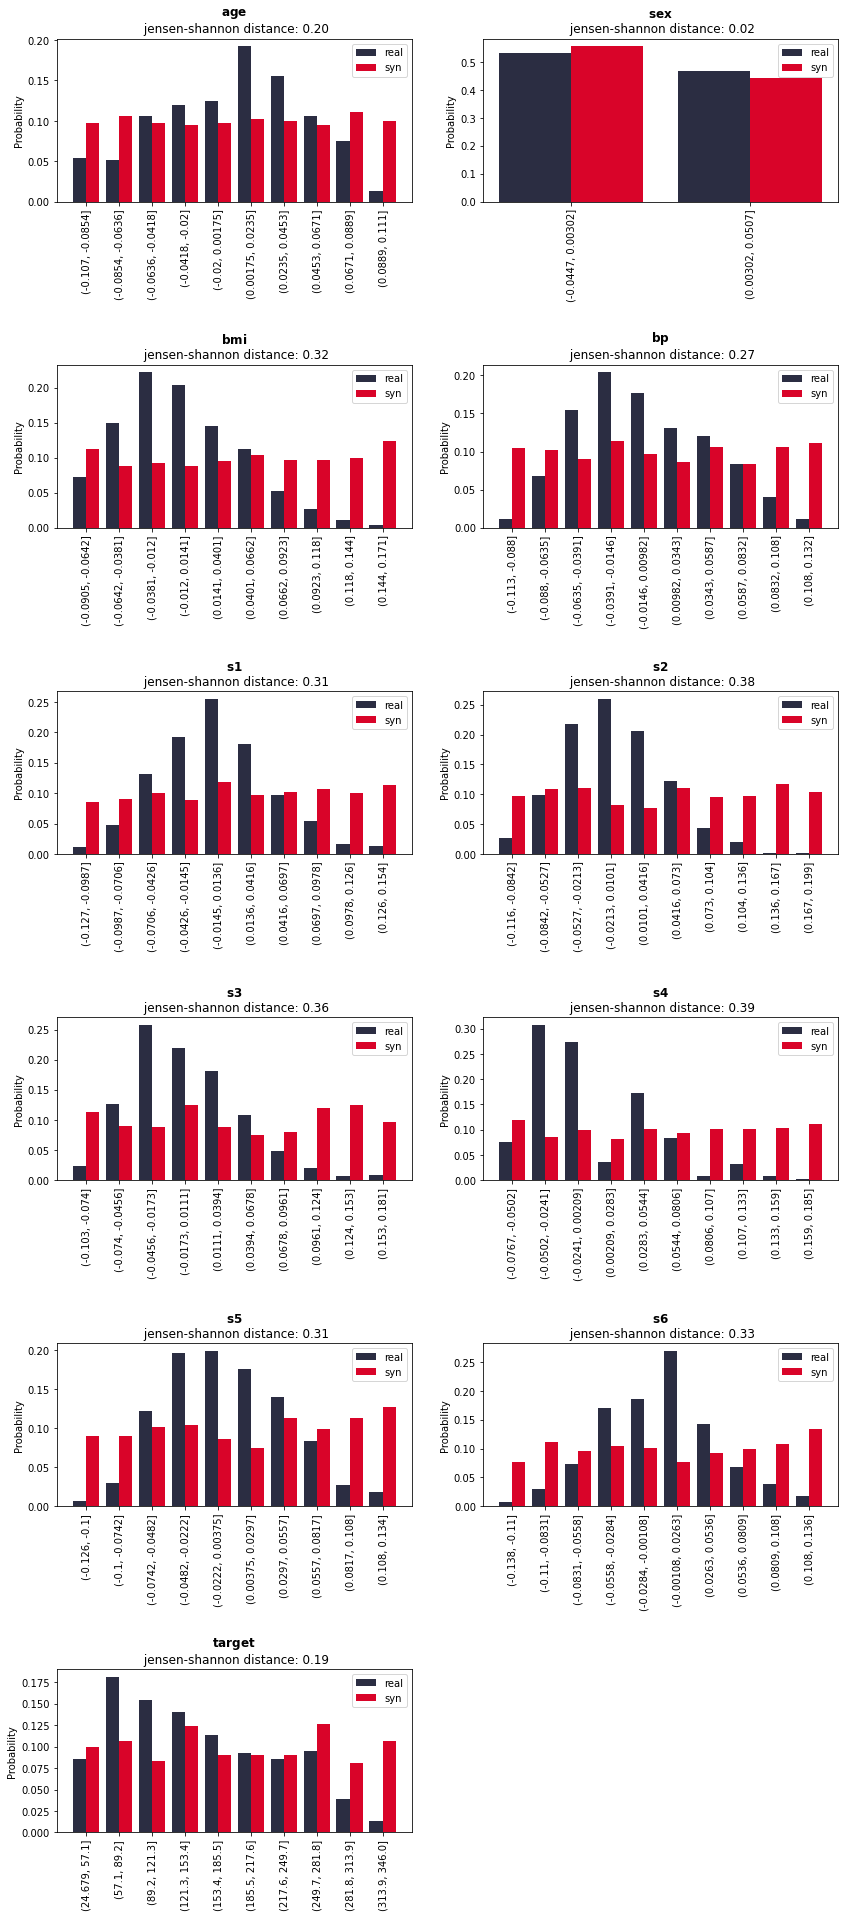

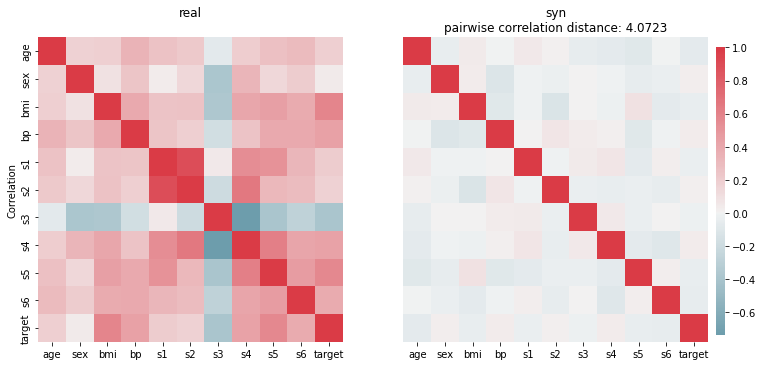

In [7]:
import matplotlib.pyplot as plt

syn_model.plot(plt, X)

plt.show()

## Benchmark the quality of plugins

In [8]:
from synthcity.benchmark import Benchmarks
constraints = Constraints(rules = [("target", "ge", 150)])

score = Benchmarks.evaluate(
    ["marginal_distributions", "dummy_sampler"],
    X,
    sensitive_columns = ["sex"],
    synthetic_size = 1000,
    synthetic_constraints = constraints,
    repeats = 5,
)


[2022-03-30T18:00:41.545493+0100][106778][INFO] Benchmarking plugin : marginal_distributions
[2022-03-30T18:00:41.546279+0100][106778][INFO]  Experiment repeat: 0
[2022-03-30T18:01:21.528488+0100][106778][INFO]  Experiment repeat: 1
[2022-03-30T18:01:59.422323+0100][106778][INFO]  Experiment repeat: 2
[2022-03-30T18:02:37.108603+0100][106778][INFO]  Experiment repeat: 3
[2022-03-30T18:03:24.004856+0100][106778][INFO]  Experiment repeat: 4
[2022-03-30T18:04:05.389335+0100][106778][INFO] Benchmarking plugin : dummy_sampler
[2022-03-30T18:04:05.390500+0100][106778][INFO]  Experiment repeat: 0
[2022-03-30T18:06:07.893479+0100][106778][INFO]  Experiment repeat: 1
[2022-03-30T18:06:14.726601+0100][106778][INFO]  Experiment repeat: 2
[2022-03-30T18:08:14.778765+0100][106778][INFO]  Experiment repeat: 3
[2022-03-30T18:10:16.069616+0100][106778][INFO]  Experiment repeat: 4


In [9]:
Benchmarks.print(score)


Comparatives


,marginal_distributions,dummy_sampler
sanity.data_mismatch_score,0.000000e+00,0.000000
sanity.common_rows_proportion,0.000000e+00,0.457919
sanity.nearest_syn_neighbor_distance,6.039455e-01,0.253657
sanity.inlier_probability,5.203620e-02,0.565611
sanity.outlier_probability,2.669683e-01,0.047511
statistical.marginal.jensenshannon_distance,6.377242e-01,0.157358
statistical.marginal.chi_squared_test,0.000000e+00,0.361227
statistical.joint.feature_correlation,4.999034e+00,1.092971
statistical.marginal.inverse_cdf_distance,3.285147e-01,0.230018
statistical.marginal.inverse_kl_divergence,5.506075e-02,0.785893



Plugin : marginal_distributions


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5,0,0.00
sanity.common_rows_proportion,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5,0,0.01
sanity.nearest_syn_neighbor_distance,6.039455e-01,6.039455e-01,6.039455e-01,7.352800e-12,6.039455e-01,1.460165e-12,5,0,0.01
sanity.inlier_probability,5.203620e-02,5.203620e-02,5.203620e-02,0.000000e+00,5.203620e-02,0.000000e+00,5,0,0.01
sanity.outlier_probability,2.669683e-01,2.669683e-01,2.669683e-01,0.000000e+00,2.669683e-01,0.000000e+00,5,0,0.01
statistical.marginal.jensenshannon_distance,6.377242e-01,6.377242e-01,6.377242e-01,0.000000e+00,6.377242e-01,0.000000e+00,5,0,0.16
statistical.marginal.chi_squared_test,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5,0,0.02
statistical.joint.feature_correlation,4.999034e+00,4.999034e+00,4.999034e+00,0.000000e+00,4.999034e+00,0.000000e+00,5,0,0.08
statistical.marginal.inverse_cdf_distance,3.055353e-01,3.374852e-01,3.285147e-01,1.161766e-02,3.332917e-01,1.340333e-03,5,0,0.91
statistical.marginal.inverse_kl_divergence,5.506075e-02,5.506075e-02,5.506075e-02,6.938894e-18,5.506075e-02,0.000000e+00,5,0,0.01




Plugin : dummy_sampler


,min,max,mean,stddev,median,iqr,rounds,errors,durations
sanity.data_mismatch_score,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,5,0,0.00
sanity.common_rows_proportion,0.457014,0.459276,0.457919,1.108366e-03,0.457014,0.002262,5,0,0.01
sanity.nearest_syn_neighbor_distance,0.253652,0.253669,0.253657,6.487846e-06,0.253654,0.000004,5,0,0.01
sanity.inlier_probability,0.565611,0.565611,0.565611,0.000000e+00,0.565611,0.000000,5,0,0.01
sanity.outlier_probability,0.047511,0.047511,0.047511,0.000000e+00,0.047511,0.000000,5,0,0.01
statistical.marginal.jensenshannon_distance,0.151728,0.162957,0.157358,4.106317e-03,0.158947,0.005921,5,0,0.15
statistical.marginal.chi_squared_test,0.359333,0.363102,0.361227,1.405627e-03,0.360781,0.002223,5,0,0.02
statistical.joint.feature_correlation,0.968769,1.180168,1.092971,8.562372e-02,1.140310,0.150554,5,0,0.10
statistical.marginal.inverse_cdf_distance,0.227066,0.233597,0.230018,2.359065e-03,0.230411,0.003357,5,0,5.58
statistical.marginal.inverse_kl_divergence,0.767721,0.793971,0.785893,9.461128e-03,0.787859,0.005516,5,0,0.01


In [11]:
import pandas as pd
import numpy as np

means = []
for plugin in score:
    data = score[plugin]["mean"]
    directions =  score[plugin]["direction"].to_dict()
    means.append(data)
    
out = pd.concat(means, axis = 1)
out.set_axis(score.keys(), axis=1, inplace=True)

bad_highlight = 'background-color: lightcoral;'
ok_highlight = 'background-color: green;'
default = ''

def highlights(row):    
    metric = row.name
    if directions[metric] == "minimize":
        best_val = np.min(row.values)
        worst_val = np.max(row)
    else:
        best_val = np.max(row.values)
        worst_val = np.min(row)
        
    styles = []
    for val in row.values:
        if val == best_val:
            styles.append(ok_highlight)
        elif val == worst_val:
            styles.append(bad_highlight)
        else:
            styles.append(default)
            
    return styles

out.style.apply(highlights, axis=1)

,marginal_distributions,dummy_sampler
sanity.data_mismatch_score,0.000000,0.000000
sanity.common_rows_proportion,0.000000,0.457919
sanity.nearest_syn_neighbor_distance,0.603946,0.253657
sanity.inlier_probability,0.052036,0.565611
sanity.outlier_probability,0.266968,0.047511
statistical.marginal.jensenshannon_distance,0.637724,0.157358
statistical.marginal.chi_squared_test,0.000000,0.361227
statistical.joint.feature_correlation,4.999034,1.092971
statistical.marginal.inverse_cdf_distance,0.328515,0.230018
statistical.marginal.inverse_kl_divergence,0.055061,0.785893


# 